# IMPORTING TENSORFLOW


In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# IMPORTING TENSORFLOW

In [2]:
import tensorflow as tf

# USING CPU


In [3]:
device = "/device:CPU:0"

# DATA IMPORTING 

In [12]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "Data\Train"

classes = os.listdir(dir_example)
print(classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18836\2964663793.py:6: SyntaxWarning: invalid escape sequence '\T'
  dir_example = "Data\Train"


In [13]:
dir_example = "Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


# DATA VISUALIZATION

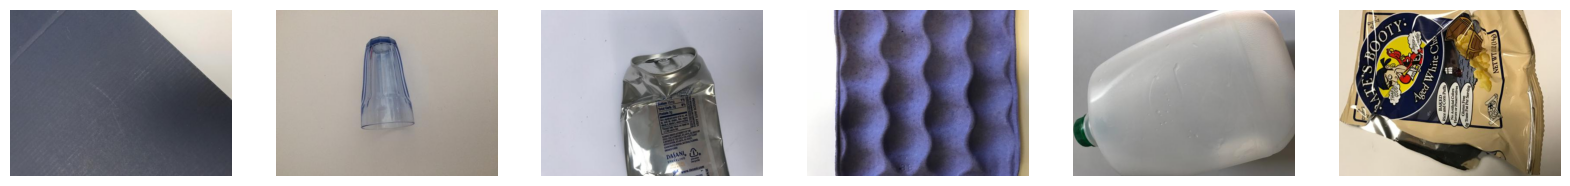

In [15]:
dir_with_examples = 'visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

In [16]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PREPARING OF DATA 

In [19]:
train = 'Data/Train'
test = 'Data/Test'

In [20]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2186 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [21]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [22]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


# Importing oneDNN 

In [25]:

# import oneDNN as dnn



# LABELING 

In [26]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# CREATING MODEL WITH oneDNN OPTIMIZATION 

In [28]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))





# COMPILING MODEL  # Enable OneDNN optimizations

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     2,803,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,843,910 (10.85 MB)

 Trainable params: 2,843,910 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING THE MODEL(10 EPOCHS)

In [31]:
model.fit(train_generator,
          epochs=10,
          steps_per_epoch=2184 // 32)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 54s 763ms/step - accuracy: 0.2052 - loss: 1.8033
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 234us/step - accuracy: 0.2500 - loss: 1.7266 
Epoch 3/10


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


68/68 ━━━━━━━━━━━━━━━━━━━━ 46s 682ms/step - accuracy: 0.3664 - loss: 1.5179
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 175us/step - accuracy: 0.5312 - loss: 1.4320 
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 50s 739ms/step - accuracy: 0.4290 - loss: 1.4590
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 133us/step - accuracy: 0.5312 - loss: 1.2189 
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 52s 769ms/step - accuracy: 0.5310 - loss: 1.2226
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 244us/step - accuracy: 0.4688 - loss: 1.1368
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 53s 774ms/step - accuracy: 0.6331 - loss: 1.0074
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 237us/step - accuracy: 0.6875 - loss: 0.9915 


# TESTING PREDICTION 

In [32]:
import keras.utils as ku
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Probability: 0.85271466
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

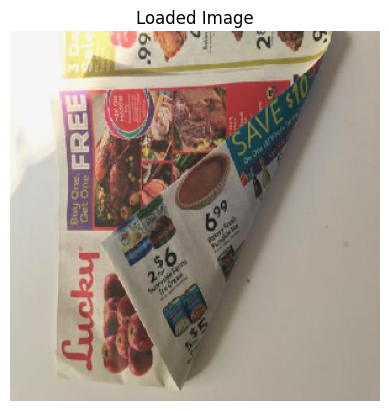

In [34]:
test_img = 'Data/Test/paper/paper522.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")


In [35]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 1.1 %
GLASS : 0.8 %
METAL : 10.95 %
PAPER : 85.27 %
PLASTIC : 1.7 %
TRASH : 0.18 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Probability: 0.3897366
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

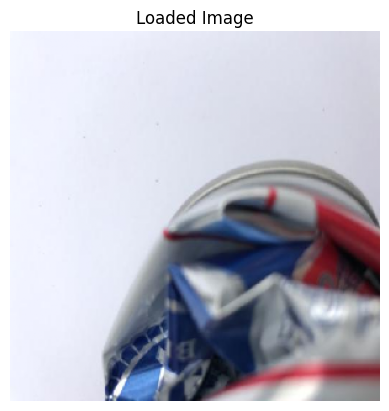

In [37]:
test_img = 'Data/Test/metal/metal386.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [38]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 8.98 %
GLASS : 8.84 %
METAL : 29.71 %
PAPER : 12.22 %
PLASTIC : 38.97 %
TRASH : 1.29 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Probability: 0.9170107
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

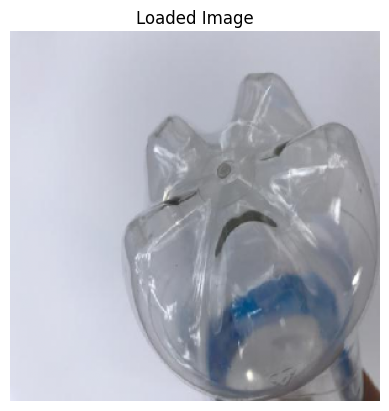

In [39]:
test_img = 'Data/Test/plastic/plastic430.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [40]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.52 %
GLASS : 1.97 %
METAL : 1.71 %
PAPER : 4.05 %
PLASTIC : 91.7 %
TRASH : 0.04 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Probability: 0.9946261
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

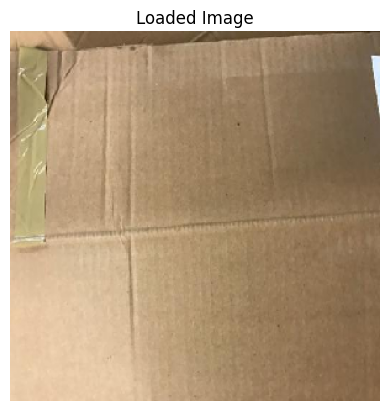

In [41]:
test_img = 'Data/Test/cardboard/cardboard355.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [42]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 99.46 %
GLASS : 0.29 %
METAL : 0.02 %
PAPER : 0.03 %
PLASTIC : 0.11 %
TRASH : 0.1 %


# SAVING THE TRAINED MODEL

In [43]:
model.save('modelnew.h5')